
**Exploratory Data Analysis - Sports**

**As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.**

**Done by Pratik Khedkar**

In [1]:
# Import all basic required library.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings
import warnings 
%matplotlib inline

In [2]:
# Importing first dataset (matches.csv) using pandas

mdf = pd.read_csv('matches.csv')

#for display first 5 rows
mdf.head() 

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
# for display last 5 rows

mdf.tail(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,5/5/2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,7/5/2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,8/5/2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/5/2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/5/2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


***Preprocessing dataset - Matches.csv***

In [4]:
#shape of the data
mdf.shape 

(756, 18)

In [5]:
#columns inside the dataset
mdf.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [6]:
#overall info about the data
mdf.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
# Checking the count of missing values in dataset
mdf.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [8]:
# dropping umpire column as it contain missing values. here total rows are 756
mdf = mdf.drop(columns=["umpire3"],axis=1)

# for display bfirst 5 rows
mdf.head(5) 

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [9]:
# Now 7 missing values in 'city' and 4 in 'winner' & 'player_of_match' columns etc.
# So turn to deal with the missing values

# to check the unique value in city column
mdf['city'].unique() 

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [10]:
# Finding column were cities are null 
mdf[mdf['city'].isnull()]['venue'] 

#As this data, we can see where the missing values are and all the matches with missing city was played at Dubai International Stadium.
#So, we can fill the missing values with the 'Dubai' city.

461    Dubai International Cricket Stadium
462    Dubai International Cricket Stadium
466    Dubai International Cricket Stadium
468    Dubai International Cricket Stadium
469    Dubai International Cricket Stadium
474    Dubai International Cricket Stadium
476    Dubai International Cricket Stadium
Name: venue, dtype: object

In [11]:
# Filling missing city in the column.
mdf['city'].fillna('Dubai', inplace=True)

print('Done')

Done


C:\Users\Admin\AppData\Local\Temp\ipykernel_17916\280106052.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mdf['city'].fillna('Dubai', inplace=True)


In [12]:
# Now turn to deal with missing values 'winner' and 'Player of match'

mdf[mdf.winner.isnull()][['result','winner','player_of_match']]


# Here we can see that missing value of WINNER & Player_of_match corresponds with the result column.

,result,winner,player_of_match
300,no result,NaN,NaN
545,no result,NaN,NaN
570,no result,NaN,NaN
744,no result,NaN,NaN


In [13]:
# Now turn to deal with missing values of 'umpire1' & 'umpire2'

# Finding column were umpire1 is null
mdf[mdf['umpire1'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
753,11413,2019,Visakhapatnam,8/5/2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN


In [14]:
#umpire1 result
mdf[(mdf['team1']=='Royal Challengers Bangalore') & (mdf['team2']=='Delhi Daredevils') & 
(mdf['toss_winner']=='Royal Challengers Bangalore') & (mdf['toss_decision']=='bat')][['umpire1','umpire2']]

,umpire1,umpire2
4,NaN,NaN
54,CK Nandan,C Shamshuddin
128,S Asnani,BG Jerling


In [15]:
# Umpire2 result
mdf[(mdf['team1']=='Sunrisers Hyderabad') & (mdf['city']=='Visakhapatnam')][['umpire1','umpire2']]

,umpire1,umpire2
528,PG Pathak,S Ravi
536,RK Illingworth,VA Kulkarni
612,S Ravi,C Shamshuddin
615,CB Gaffaney,VK Sharma
753,NaN,NaN


In [16]:
# Filling data in missing place.

mdf.loc[4, 'umpire1'] = 'CK Nandan'
mdf.loc[4, 'umpire2'] = 'C Shamshuddin'

mdf.loc[753, 'umpire1'] = 'CB Gaffaney'
mdf.loc[753, 'umpire2'] = 'VK Sharma'

In [17]:
# Number of unique values in each columns

for i in mdf.columns:
    print(i,len(mdf[i].unique()))

id 756
season 12
city 33
date 546
team1 15
team2 15
toss_winner 15
toss_decision 2
result 3
dl_applied 2
winner 16
win_by_runs 89
win_by_wickets 11
player_of_match 227
venue 41
umpire1 61
umpire2 65


In [18]:
# Printing all the city hosted Indian premiere league matches.

sorted(mdf['city'].unique())

['Abu Dhabi',
 'Ahmedabad',
 'Bangalore',
 'Bengaluru',
 'Bloemfontein',
 'Cape Town',
 'Centurion',
 'Chandigarh',
 'Chennai',
 'Cuttack',
 'Delhi',
 'Dharamsala',
 'Dubai',
 'Durban',
 'East London',
 'Hyderabad',
 'Indore',
 'Jaipur',
 'Johannesburg',
 'Kanpur',
 'Kimberley',
 'Kochi',
 'Kolkata',
 'Mohali',
 'Mumbai',
 'Nagpur',
 'Port Elizabeth',
 'Pune',
 'Raipur',
 'Rajkot',
 'Ranchi',
 'Sharjah',
 'Visakhapatnam']

In [19]:
# Bengaluru and Bangalore both are in the data when they are same. So we have merge them.
# Changing Bengaluru to Bangalore.

mdf['city'] = mdf['city'].replace('Bengaluru', 'Bangalore')

print('Done')

Done


In [20]:
# Printing all the team playing in Indian Premiere league.

sorted(mdf['team1'].unique())

['Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

In [21]:
# Here we can see Rising Pune Supergiants so we need to merge.

mdf['team1'] = mdf['team1'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant')

print('Done')

Done


In [22]:
# Now turn to check with team2

sorted(mdf['team2'].unique())

['Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

In [23]:
# Statistical overview of data

mdf.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


***Second dataset result - Deliveries.csv***

In [24]:
# Importing dataset (deliveries.csv) using pandas

ddf = pd.read_csv('deliveries.csv')

#for display first 5 rows
ddf.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [25]:
# for display last 5 rows

ddf.tail(5) 

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [26]:
ddf.shape 


(179078, 21)

In [27]:
ddf.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [28]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [29]:
# Checking the count of missing values in dataset

ddf.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

**Here in last three columns a lot of missing values are there and we have justified them below :-**
**1. Players can not be dismiss every ball when the player is not out on any given ball. SO columns must be missing.
2. Dismissal_kind and fielder columns consists more missing values because a fielder can't be involve in every dismissal.**

In [30]:
# Statistical overview of second dataframe
ddf.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [31]:
# This is the complete frame of both dataframe
frames = [mdf, ddf]
  
result = pd.concat(frames)
result.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1.0,2017.0,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2017.0,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,2017.0,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,2017.0,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2017.0,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***Data Visualization Part***

In [32]:
#category - wise analysis 

result['winner'].value_counts()

winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64

OSError: 'seaborn-whitegrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

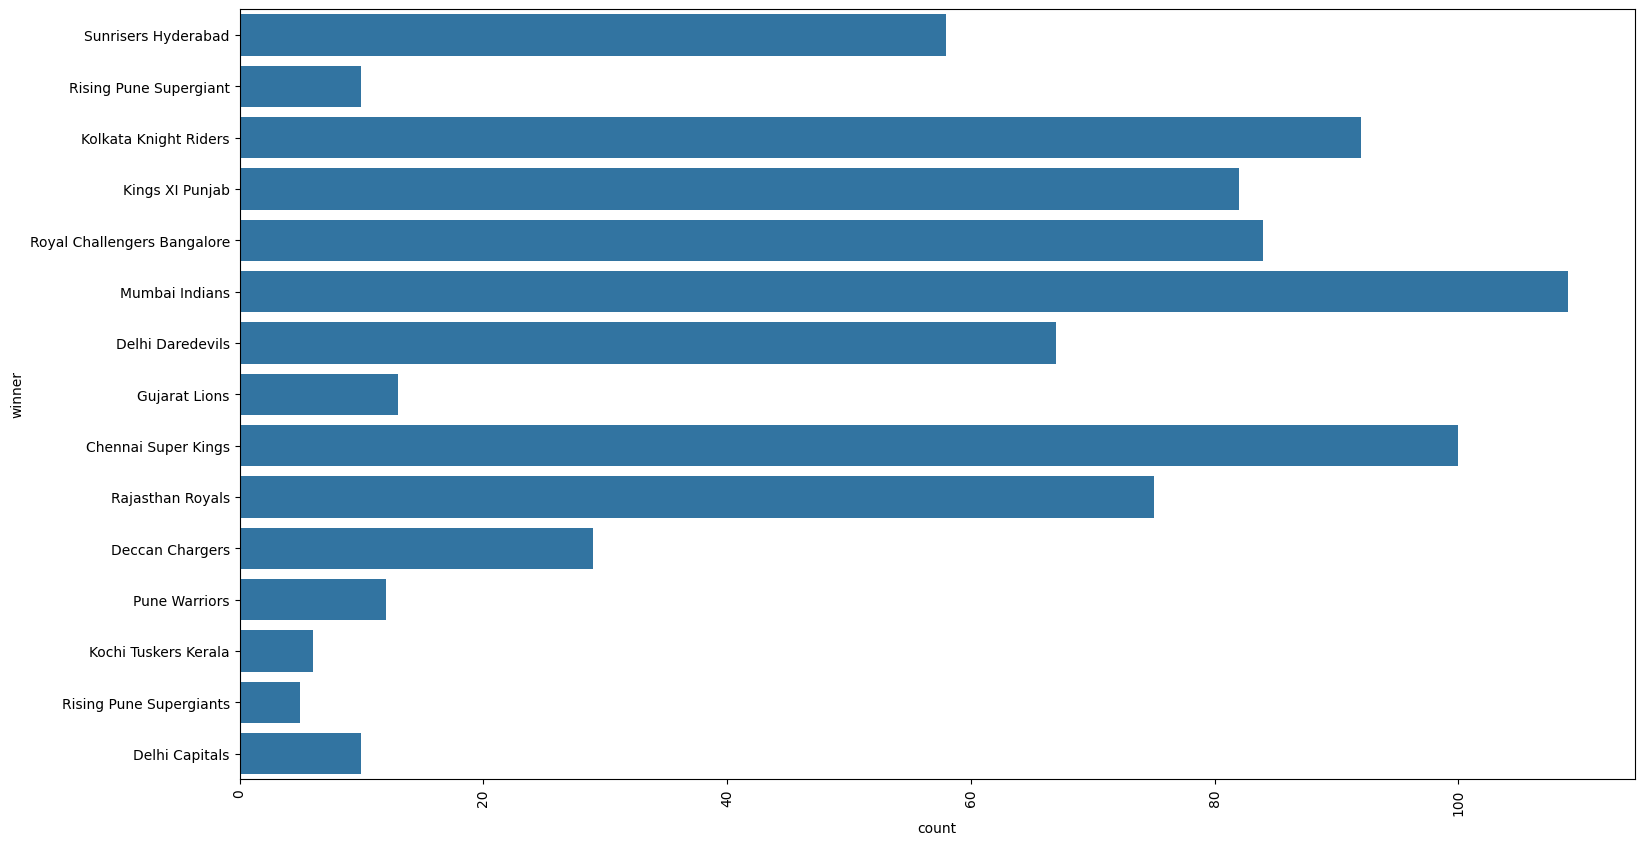

In [33]:
plt.figure(figsize=(18,10))
sns.countplot(result['winner'])
plt.xticks(rotation=90)

# Change style to seaborn-whitegrid
plt.style.use('seaborn-whitegrid')  
plt.title('Teams with total number of wins', fontsize=15, fontweight='bold')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_17916\452444256.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='season', data=result_unique_season, palette='summer')


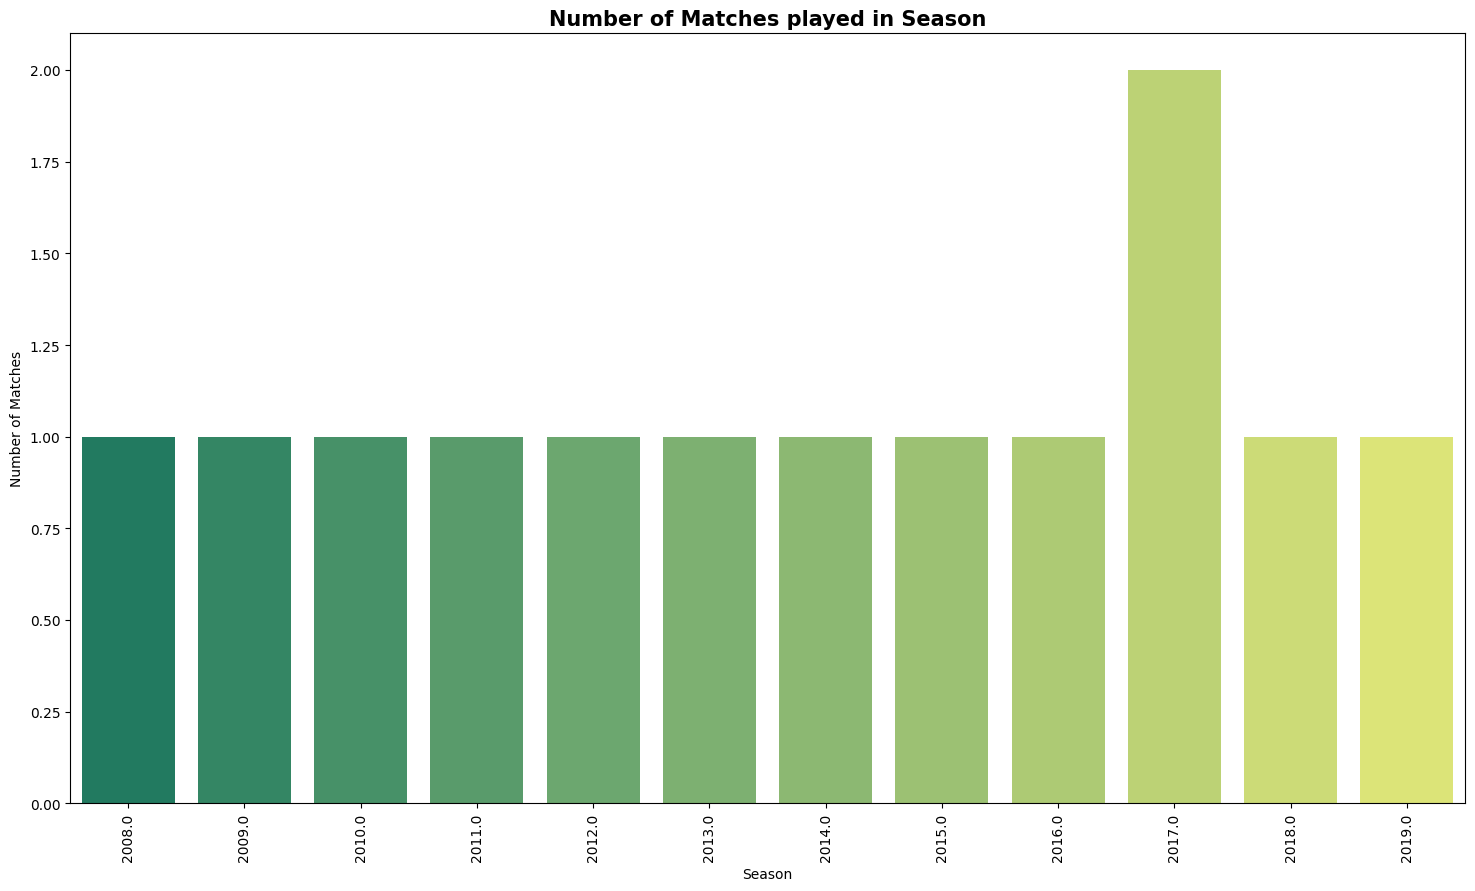

In [35]:
# Drop duplicate values in the 'season' column
result_unique_season = result.drop_duplicates(subset='season')

plt.figure(figsize=(18,10))
sns.countplot(x='season', data=result_unique_season, palette='summer')
plt.xticks(rotation=90)
plt.title('Number of Matches played in Season', fontsize=15, fontweight='bold')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.show()

Text(0.5, 1.0, 'Number of stadiums in different cities')

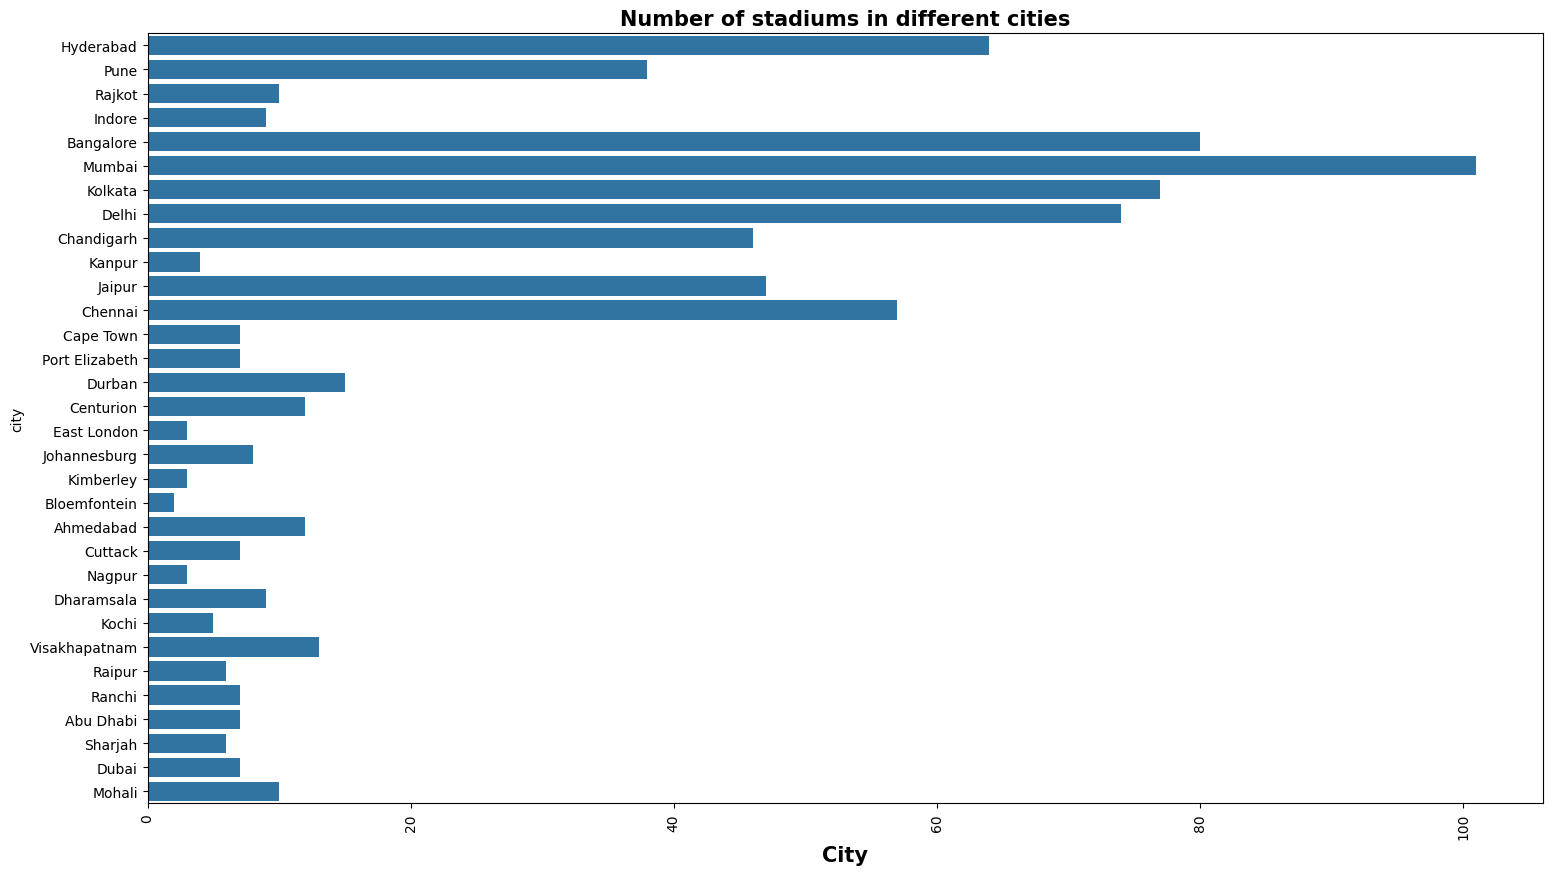

In [36]:
# Plotting graph for number of stadiom in different cities

plt.figure(figsize=(18,10))
sns.countplot(result['city'])
plt.xticks(rotation=90)
plt.xlabel('City', fontsize=15, fontweight='bold')
plt.title('Number of stadiums in different cities',fontsize=15,fontweight='bold')

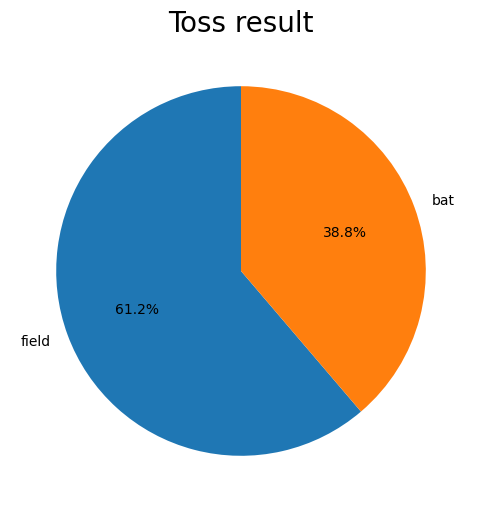

Around 60% times captain took decision field after winning the toss


In [37]:
# We will plot pie chart on Toss decision
Toss=result.toss_decision.value_counts()

labels=np.array(Toss.index)
sizes = Toss.values
plt.figure(figsize = (8,6))
plt.pie(sizes, labels=labels, autopct='%2.1f%%', startangle=90)
plt.title('Toss result',fontsize=20)
plt.show()

print('Around 60% times captain took decision field after winning the toss')

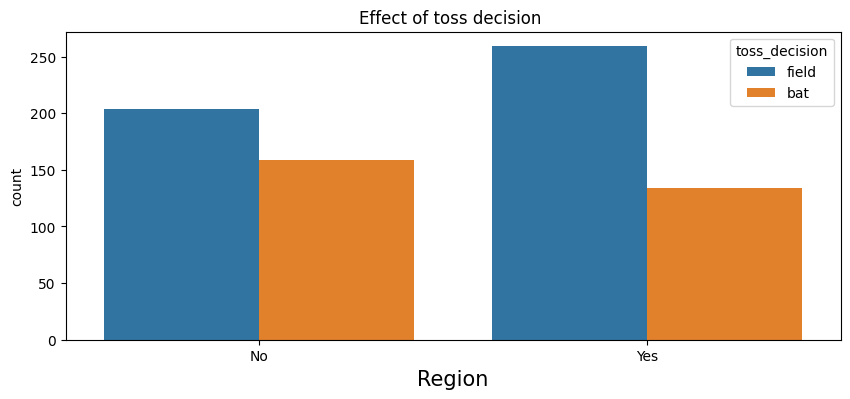

When teams winning the tosses and choose field have won matches most of the times.


In [38]:
result['toss_win_game_win'] = np.where((result.toss_winner == result.winner),'Yes','No')
plt.figure(figsize=(10,4))
sns.countplot(x=result['toss_win_game_win'], hue=result['toss_decision'])
plt.title('Effect of toss decision ')
plt.xlabel('Region',fontsize=15)
plt.show()

print('When teams winning the tosses and choose field have won matches most of the times.')

In [42]:
# Check for duplicate labels in 'toss_winner' column
print("Duplicate labels in 'toss_winner':", result['toss_winner'].duplicated().any())

# Check for duplicate labels in 'toss_decision' column
print("Duplicate labels in 'toss_decision':", result['toss_decision'].duplicated().any())


Duplicate labels in 'toss_winner': True
Duplicate labels in 'toss_decision': True


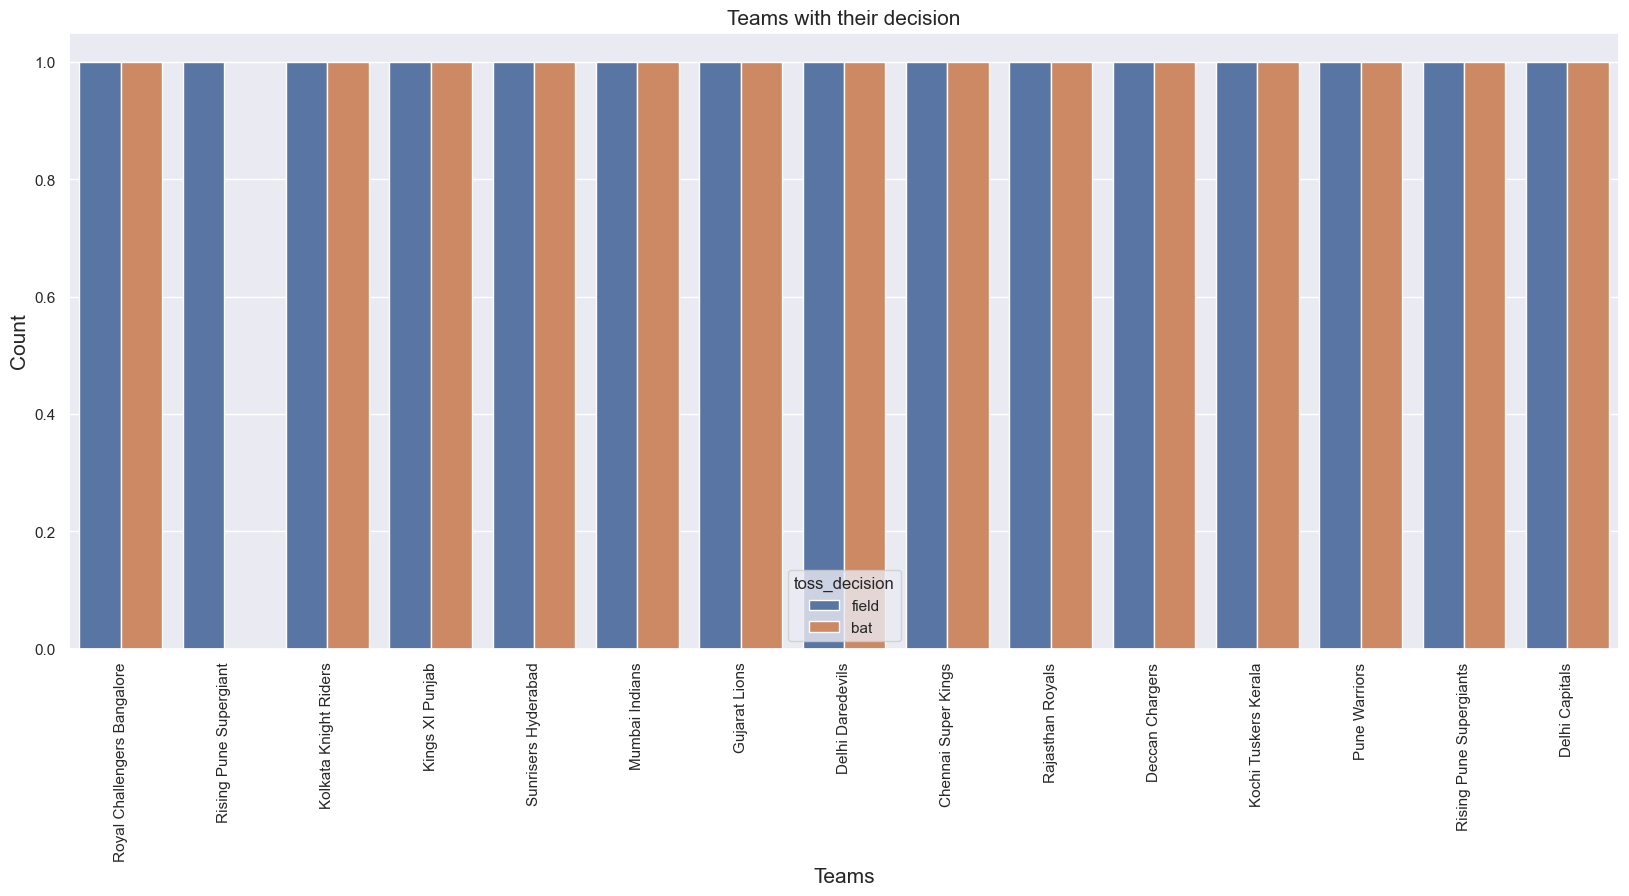

Most of the teams choose field first after winning the toss except PUNE WARRIORS & CHENNAI SUPER KINGS


In [43]:
# Drop duplicates from 'toss_winner' and 'toss_decision' columns
result_unique = result.drop_duplicates(subset=['toss_winner', 'toss_decision'])

# Set figure size using sns.set
sns.set(rc={'figure.figsize':(20,8)})

# Create count plot
sns.countplot(x=result_unique['toss_winner'], hue=result_unique['toss_decision'])

# Add title and labels
plt.title('Teams with their decision', fontsize=15)
plt.xlabel('Teams', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=90)

# Show plot
plt.show()

# Additional information
print('Most of the teams choose field first after winning the toss except PUNE WARRIORS & CHENNAI SUPER KINGS')


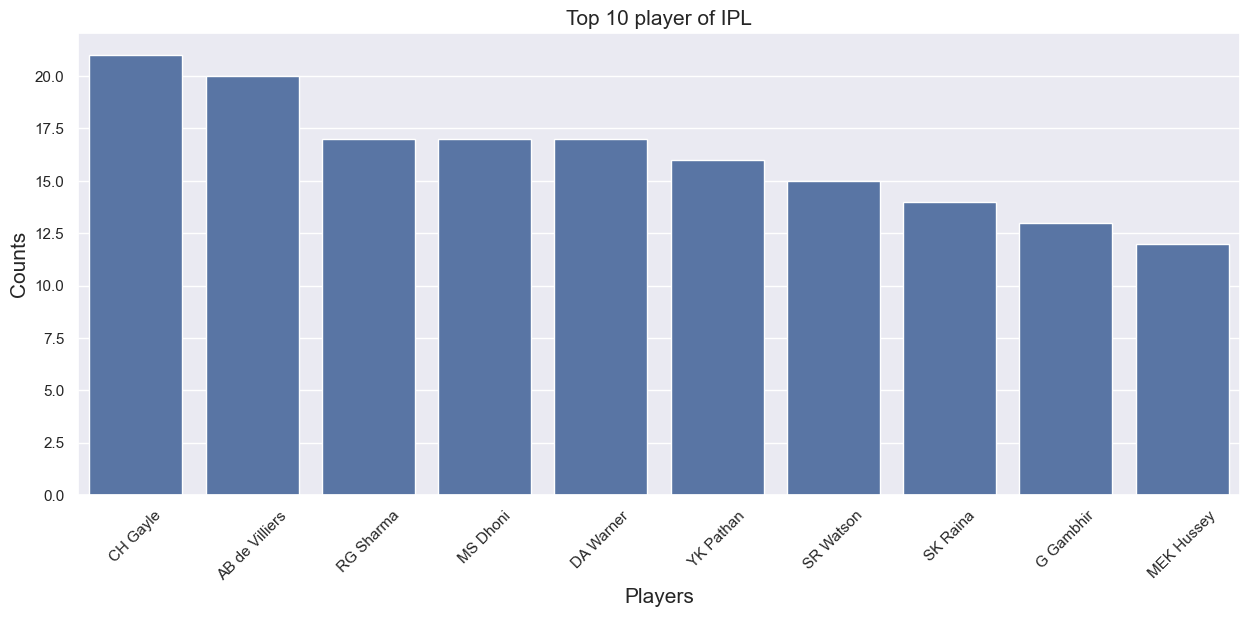

In [45]:
# Get the top 10 players and their counts
top_players = result['player_of_match'].value_counts()[:10]

# Plotting
plt.figure(figsize=(15,6))
sns.barplot(x=top_players.index, y=top_players.values)
plt.title('Top 10 player of IPL', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.xlabel('Players', fontsize=15)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [46]:
# we will print winner season wise
final=result.drop_duplicates(subset=['season'], keep='last')

final[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008.0,Rajasthan Royals
2,2009.0,Deccan Chargers
3,2010.0,Chennai Super Kings
4,2011.0,Chennai Super Kings
5,2012.0,Kolkata Knight Riders
6,2013.0,Mumbai Indians
7,2014.0,Kolkata Knight Riders
8,2015.0,Mumbai Indians
9,2016.0,Sunrisers Hyderabad
0,2017.0,Mumbai Indians


In [47]:
# we will print number of season won by teams
final["winner"].value_counts()

winner
Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: count, dtype: int64

Text(0, 0.5, 'Total Runs Scored')

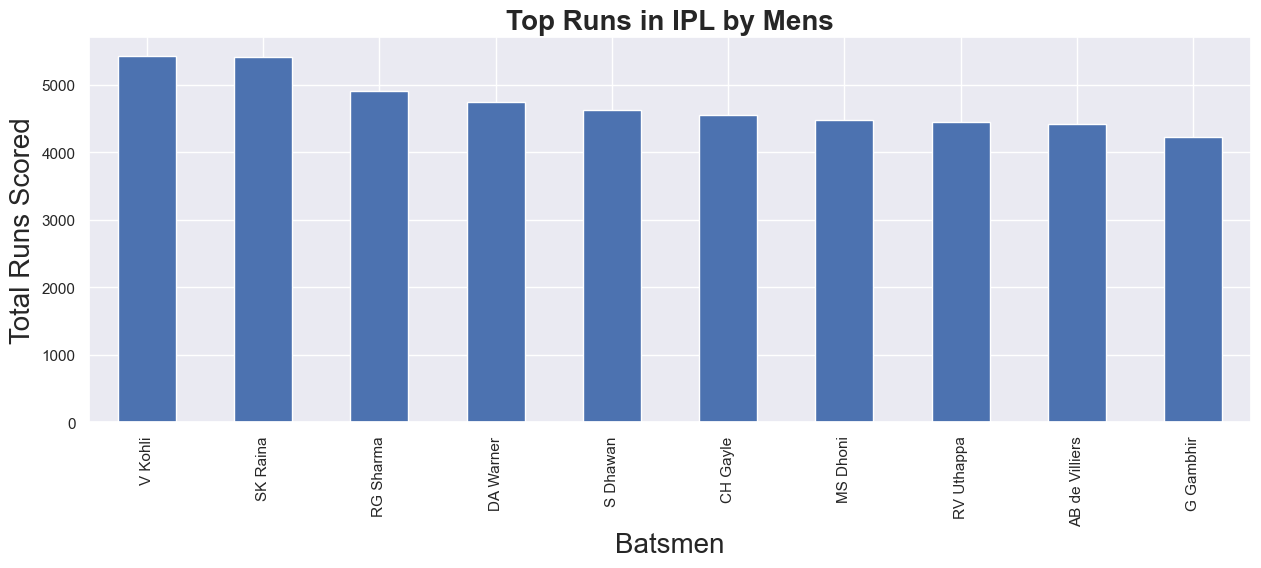

In [48]:
# All the top 10 batsman according to the match result
result.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False)[:10].plot(kind = 'bar', figsize = (15,5))

plt.title("Top Runs in IPL by Mens", fontsize = 20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 20)
plt.ylabel("Total Runs Scored", size = 20)

Text(0, 0.5, 'Total Wickets Taken')

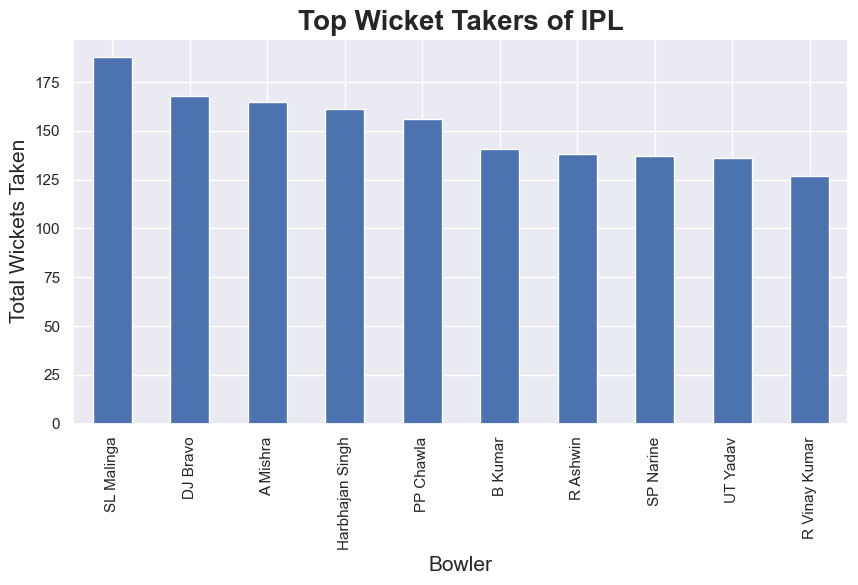

In [49]:
# Graph of top 10 bowler amd wicket taker
result.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False)[:10].plot(kind = 'bar',figsize=(10,5))
plt.title("Top Wicket Takers of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Bowler", size = 15)
plt.ylabel("Total Wickets Taken", size = 15)

In [50]:
# We will print number of 6 hits by any team
six=result[result['batsman_runs']==6]
six.groupby('batting_team')['batsman_runs'].agg([('Runs by six','sum'),('Sixes by a Team','count')])

,Runs by six,Sixes by a Team
batting_team,,
Chennai Super Kings,5838.0,973
Deccan Chargers,2400.0,400
Delhi Capitals,522.0,87
Delhi Daredevils,4806.0,801
Gujarat Lions,930.0,155
Kings XI Punjab,5856.0,976
Kochi Tuskers Kerala,318.0,53
Kolkata Knight Riders,5580.0,930
Mumbai Indians,6576.0,1096


In [51]:
# We will print numbers of fours hit by team.

four=result[result['batsman_runs']==4]
four.groupby('batting_team')['batsman_runs'].agg([('Runs by fours','sum'),('Fours by a teams','count')])

,Runs by fours,Fours by a teams
batting_team,,
Chennai Super Kings,8772.0,2193
Deccan Chargers,3828.0,957
Delhi Capitals,968.0,242
Delhi Daredevils,8632.0,2158
Gujarat Lions,1840.0,460
Kings XI Punjab,9832.0,2458
Kochi Tuskers Kerala,680.0,170
Kolkata Knight Riders,9736.0,2434
Mumbai Indians,10352.0,2588


In [52]:
# We will print no of matches played by a batsman.

player= result[["match_id","player_dismissed"]]
player =player.groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
player.columns=["Name of Batsman","No of Matches played"]
player[:10]

,Name of Batsman,No of Matches played
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137
5,G Gambhir,136
6,KD Karthik,135
7,PA Patel,126
8,AM Rahane,116
9,AT Rayudu,115


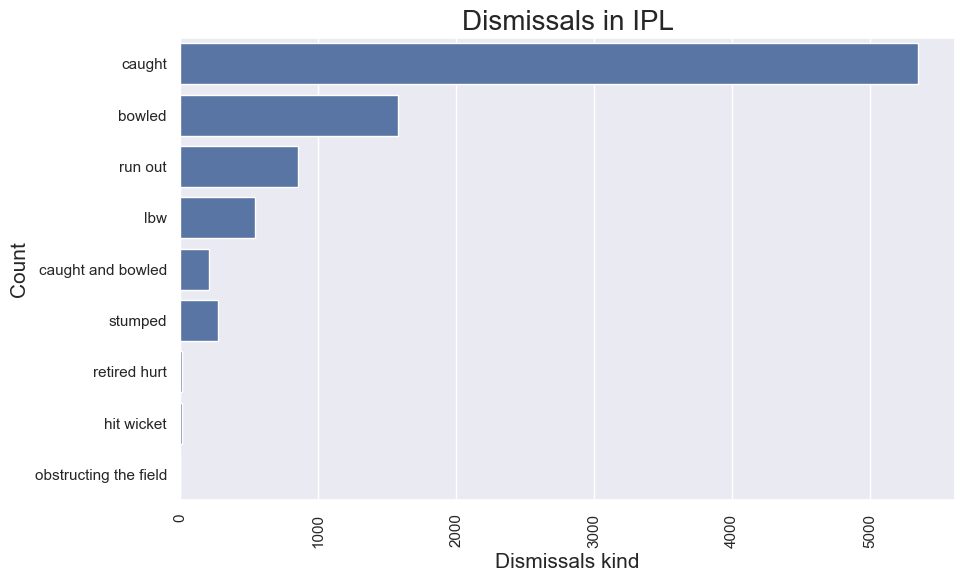

In [54]:
# Dismissals in IPL
plt.figure(figsize=(10,6))
ax=sns.countplot(result.dismissal_kind)
plt.title("Dismissals in IPL",fontsize=20)
plt.xlabel("Dismissals kind",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [55]:
#top 10 bowler of dot balls
bow = result.bowler[result.total_runs==0].value_counts()[:10]

In [56]:
bow

bowler
Harbhajan Singh    1244
SL Malinga         1144
B Kumar            1116
A Mishra           1108
PP Chawla          1100
P Kumar            1075
R Ashwin           1067
SP Narine          1038
DW Steyn            996
UT Yadav            942
Name: count, dtype: int64

In [57]:
# checking for super overs

superover=result['is_super_over'].value_counts()
superover

is_super_over
0.0    178997
1.0        81
Name: count, dtype: int64

In [59]:
# Replace '1' with 'yes' and '0' with 'no' for better analysis.

result['is_super_over'].replace(to_replace=1, value='Yes', inplace=True)
result['is_super_over'].replace(to_replace=0, value='No', inplace=True)


In [60]:
superover=result['is_super_over'].value_counts()
superover

is_super_over
no     178997
yes        81
Name: count, dtype: int64

**Only the 81 times super over is happend according to this dataset.**

***Report :-***

**1. The highest number of match won by Mumbai Indians and has won the most number of toss.**
**2. After winning toss most of teams decided to do fielding.**
**3. Teams which bowl first has higher chances of winning then the team which bat first.**
**4. Mumbai city has hosted the most number of IPL matches.**
**5. Other seasons have approximately 58-60 matches while 2011-2013 have more than 70 matches.**
**6. 10 teams played in 2011 and 9 teams each in 2012 and 2013.**
**7. Most teams field first after winning toss except for Chennai Super Kings who has mostly choose to bat first. Deccan Chargers and Pune Warriors     also show the same trend.**
**8. According this dataset 9 times match has tie result.**
**9. Super over vhave held 81 times.**
**10. Caught ball was the most dismissals in IPL.**
**11. Maximum number of four & six hit by team Chennai Super Kings.**
**12. Total 14 teams participated in 2008-2019 out of which only 6 teams manged to win the IPL title.**

***Player***

**1. Chris Gayle has won the maximum number of player of the match title.**
**2. The highest number of six hit by player is Chris Gayle.**
**3. Top leading run scorer in IPL is Virat kholi, SK Raina, RG Sharma.**
**4. S. Ravi(Sundaram Ravi) has officiated the most number of IPL matches on-field.**
**5. The highest number of matches played by player name are SK Raina, RG Sharma according to this dataset.**
**6. Malinga has taken the most number of wickets in IPL.**
**7. H. singh holds the record of most dot balls.**
**8. From the top 3 player analysis Suresh Raina is most consistant player according to the dataset.**
**9. M. S Dhoni involves in most number of dismissal as fielder by KD Karthik And RV utappa.**